# Введение

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.9 MB 5.5 MB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=3245f24c9d1654182c6430d9208d40a54183a6da92110e6b3682bf8f6ebfe8cc
  Stored in directory: /root/.cache/pip/wheels/d7/e5/36/85d319586b4a405d001029d489102f526ce5546248c295932a
Successfully built pydataset


In [ ]:
import shap
import xgboost as xgb
import pandas as pd
from pydataset import data

initiated datasets repo at: /root/.pydataset/


In [ ]:
data = data('titanic')

In [ ]:
print(data.shape)
data.head()

(1316, 4)


,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes


In [ ]:
datadum = pd.get_dummies(data, drop_first = True)

In [ ]:
x = datadum.iloc[:, :-1]
y = datadum.iloc[:, -1]

In [ ]:
x

,class_2nd class,class_3rd class,age_child,sex_women
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
...,...,...,...,...
1312,0,1,1,1
1313,0,1,1,1
1314,0,1,1,1
1315,0,1,1,1


In [ ]:
y

1       1
2       1
3       1
4       1
5       1
       ..
1312    0
1313    0
1314    0
1315    0
1316    0
Name: survived_yes, Length: 1316, dtype: uint8

In [ ]:
matrix = xgb.DMatrix(x, label = y)

params = {
    'random_state': 1502,
    'eval_metric': 'auc',
    'objective': 'binary:logistic'
}

model = xgb.train(params = params,
                  dtrain = matrix,
                  num_boost_round = 20)

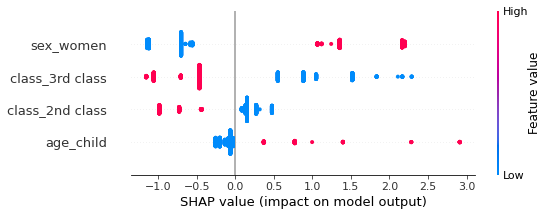

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x)
shap.summary_plot(shap_values, x)

# Регрессия

In [ ]:
import xgboost as xgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [ ]:
boston = datasets.load_boston()
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(430, 13)
(76, 13)
(430,)
(76,)


In [ ]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(verbosity=0)


In [ ]:
xgbr.fit(xtrain, ytrain)

XGBRegressor(verbosity=0)

In [ ]:
score = xgbr.score(xtrain, ytrain)  
print("Training score: ", score)

Training score:  0.9724863655644913


In [ ]:
scores = cross_val_score(xgbr, xtrain, ytrain, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.87


In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.87


In [ ]:
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 9.69
RMSE: 3.11


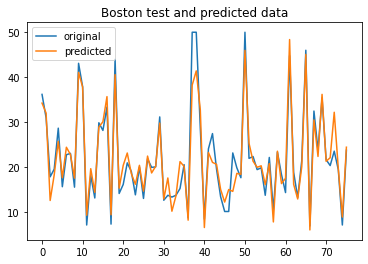

In [ ]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

# Бинарная классифкация

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
data = 'Wholesale customers data.csv'
df = pd.read_csv(data)

In [ ]:
df.shape

(440, 8)

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [ ]:
x = df.drop('Channel', axis=1)
y = df['Channel']
y[y == 2] = 0
y[y == 1] = 1

In [ ]:
x.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [ ]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

In [ ]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
params = {
  'objective':'binary:logistic',
  'max_depth': 4,
  'alpha': 10,
  'learning_rate': 1.0,
  'n_estimators': 100
}

xgb_clf = XGBClassifier(**params)

xgb_clf.fit(x_train, y_train)

XGBClassifier(alpha=10, learning_rate=1.0, max_depth=4)

In [ ]:
print(xgb_clf)

XGBClassifier(alpha=10, learning_rate=1.0, max_depth=4)


In [ ]:
y_pred = xgb_clf.predict(x_test)

In [ ]:
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.9167


In [ ]:
params = {
    "objective": "binary:logistic",
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10
}

xgb_cv = cv(dtrain=data_dmatrix, 
            params=params, nfold=3,
            num_boost_round=50,
            early_stopping_rounds=10,
            metrics="auc",
            as_pandas=True,
            seed=123)

xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.917860,0.006809,0.888360,0.037170
1,0.920484,0.011244,0.886998,0.037300
2,0.931564,0.003005,0.882138,0.041967
3,0.943088,0.017875,0.891426,0.053799
4,0.940179,0.024116,0.885100,0.055394


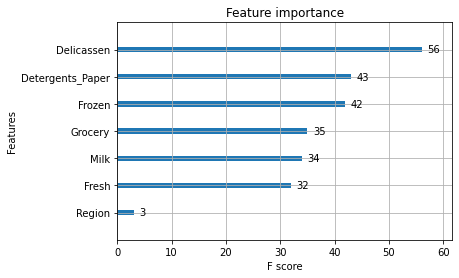

In [ ]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

In [ ]:
id = 3
print(y_pred[id])
x_test.iloc[[id]]

0


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
319,2,9759,25071,17645,1128,12408,1625


# Многоклассовая классификация

In [15]:
import xgboost as xgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
iris = datasets.load_iris()
numSamples, numFeatures = iris.data.shape

print(iris.data.shape)
print(iris.target_names)

(150, 4)
['setosa' 'versicolor' 'virginica']


In [9]:
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [10]:
train = xgb.DMatrix(x_train, label = y_train)
test = xgb.DMatrix(x_test, label = y_test)

In [11]:
params = {
    'max_depth': 4,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 3
}
epochs = 10

In [12]:
model = xgb.train(params, train, epochs)

In [16]:
predictions = model.predict(test)
predictions

array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 2., 1., 0., 0., 2., 0., 0., 1., 1., 0.], dtype=float32)

In [17]:
accuracy_score(y_test, predictions)

1.0